#QUESTION 2: Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World



Now that you are having a basic knowledge of how the agent must work, recall our discussions regarding the agent types and environment. We will now include the PEAS information and redesign the agent.
In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [3]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [4]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'east'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [5]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [6]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: north
step 1 - action: south
step 2 - action: east
step 3 - action: east
step 4 - action: suck
step 5 - action: east
step 6 - action: east
step 7 - action: south
step 8 - action: west
step 9 - action: south
step 10 - action: east
step 11 - action: east
step 12 - action: suck
step 13 - action: south
step 14 - action: suck
step 15 - action: south
step 16 - action: east
step 17 - action: north
step 18 - action: suck
step 19 - action: west


4

# Tasks


1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty.
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [7]:
import random
import numpy

class Environment():
  def __init__(self):
    self.condition= [[1 if random.random()<0.2 else 0 for i in range(5)] for i in range(5)]
    self.location = None

  def __str__(self):
    mat = numpy.array(self.condition)
    return "Vaccum Location: " + str(self.location) + "\nCondition Matrix:\n" + str(mat)

  def isClean(self):
    full_clean = numpy.zeros((5, 5))
    return numpy.array_equal(self.condition, full_clean)

env = Environment()
print(env)

Vaccum Location: None
Condition Matrix:
[[0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]]


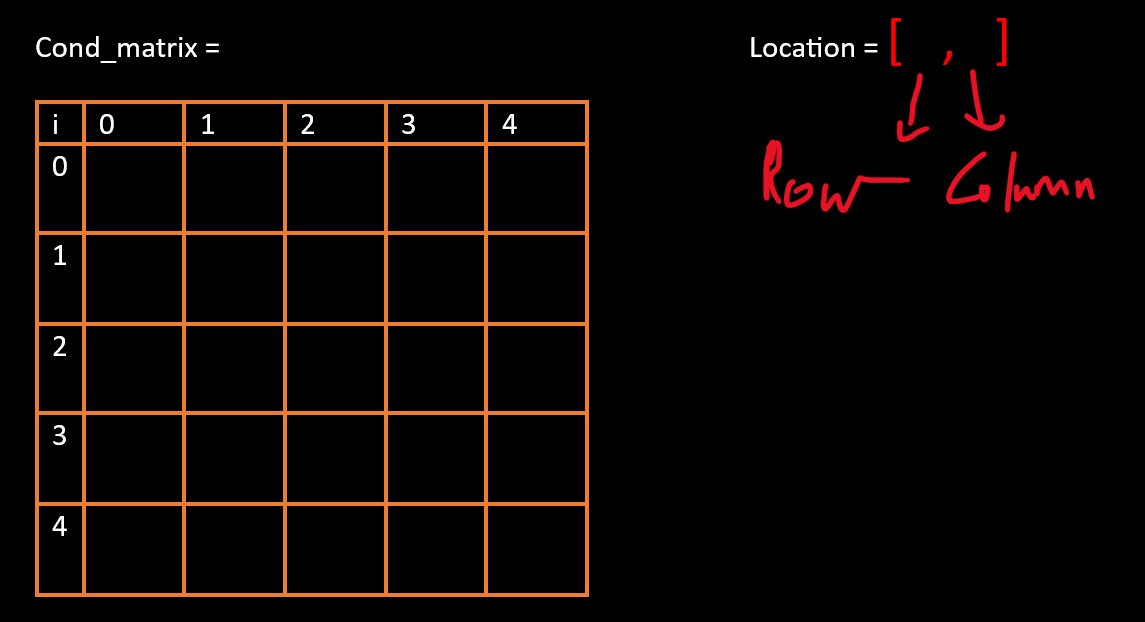

In [8]:
z = numpy.zeros((5, 5))
mat = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
numpy.array_equal(z, mat)

True

In [9]:
def Agent(bumpers, dirty):
  # This is a simple agent
  # it only considers the sensors as input and provides huge weight to their activation
  # the agent has not learned path optimization or cost optimization
  actions = ["North", "East", "West", "South"]
  if dirty:
    return "Clean"
  Action = random.choice(actions)
  while bumpers[Action] == True:
    # if sensors are not activated choose direction to move randomly
    Action = random.choice(actions)
  return Action

In [10]:
def Intelligent_Agent(bumpers, dirty, Environment):
  """
  In Progress:
  • should not traverse the same cells it has cleaned or moved over
  • mark each visited cell
  • if visiting a previous cell is neccessary, reduce that cost also
  • dfs provides best score for cost optimization
  """
  actions = ["North", "East", "West", "South"]
  if dirty:
    return "Clean"
  Action = "North"
  return Action

In [11]:
def Agent_program(Agent, Environment, max_steps, verbose=False):
  spawn = [random.randint(0, 4),random.randint(0, 4)]
  cleaned = 0
  Environment.location = spawn
  dirty, bumpers = percept(Environment)
  print(Environment)
  for i in range(max_steps):
    dirty, bumpers = percept(Environment)
    Action = Agent(bumpers, dirty)
    if Action == "Clean":
      cleaned+=1
    Effectors(Environment, Action)
    if Environment.isClean():
      print("Environment is clean")
      break
    if verbose:
      print(Environment)
  print("Cells Cleaned :", cleaned)

In [12]:
def percept(Environment):
  bumpers = {}
  loc = Environment.location

  dirty = Environment.condition[loc[0]][loc[1]]

  bumpers["North"] = not bool(loc[0])
  bumpers["West"] = not bool(loc[1])
  bumpers["East"] = not bool(4-loc[1])
  bumpers["South"] = not bool(4-loc[0])
  return dirty, bumpers

def Effectors(Environment, Action):
  loc = Environment.location
  if Action == "Clean":
    print(f"Location ({loc[0]}, {loc[1]}) is Dirty.")
    Environment.condition[loc[0]][loc[1]] = 0
    print(f"Location ({loc[0]}, {loc[1]}) has been Cleaned.")
  elif Action == "North":
    print(f"Moving North - ({loc[0]-1}, {loc[1]})")
    Environment.location[0] -= 1
  elif Action == "East":
    print(f"Moving East - ({loc[0]}, {loc[1]+1})")
    Environment.location[1] += 1
  elif Action == "West":
    print(f"Moving West - ({loc[0]}, {loc[1]-1})")
    Environment.location[1] -= 1
  else:
    print(f"Moving South - ({loc[0]+1}, {loc[1]})")
    Environment.location[0] += 1



The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

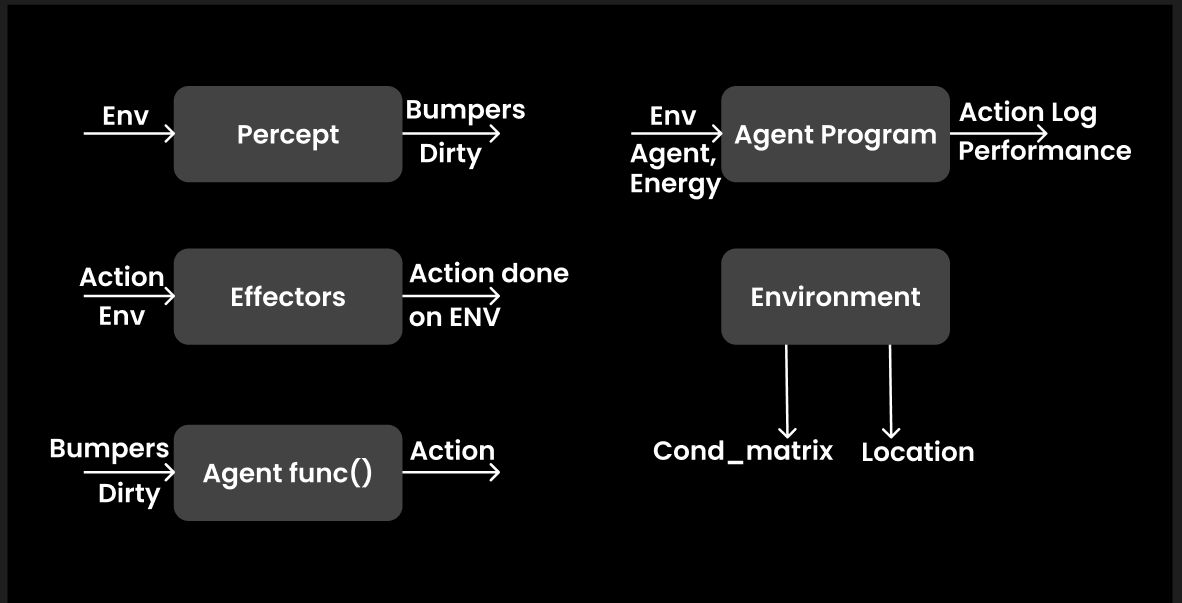

In [13]:
env = Environment()
Agent_program(Agent, env, 500)

Vaccum Location: [3, 4]
Condition Matrix:
[[0 1 0 1 0]
 [1 0 0 0 0]
 [1 0 1 1 0]
 [0 0 0 0 0]
 [0 0 1 0 0]]
Moving North - (2, 4)
Moving North - (1, 4)
Moving West - (1, 3)
Moving West - (1, 2)
Moving South - (2, 2)
Location (2, 2) is Dirty.
Location (2, 2) has been Cleaned.
Moving South - (3, 2)
Moving North - (2, 2)
Moving South - (3, 2)
Moving South - (4, 2)
Location (4, 2) is Dirty.
Location (4, 2) has been Cleaned.
Moving North - (3, 2)
Moving North - (2, 2)
Moving West - (2, 1)
Moving West - (2, 0)
Location (2, 0) is Dirty.
Location (2, 0) has been Cleaned.
Moving East - (2, 1)
Moving South - (3, 1)
Moving North - (2, 1)
Moving North - (1, 1)
Moving West - (1, 0)
Location (1, 0) is Dirty.
Location (1, 0) has been Cleaned.
Moving South - (2, 0)
Moving North - (1, 0)
Moving North - (0, 0)
Moving South - (1, 0)
Moving North - (0, 0)
Moving East - (0, 1)
Location (0, 1) is Dirty.
Location (0, 1) has been Cleaned.
Moving South - (1, 1)
Moving West - (1, 0)
Moving North - (0, 0)
Moving

In [14]:
# Your code and description goes here